# Extract features from tissue images
In addition to the spatial gene expression values, visium datasets also contain high-resolution images of the tissue.
In this notebook we extract features from this image and create a `obs x features` matrix that can be analysed together with the `obs x genes` spatial gene expression matrix. 
For this we will use the `calculate_image_features` function.

We will have a detailled look at the currently implemented features:
- summary statistics of each color channel (`summary`)
- histogram of oriented gradients (`hog`) - NOTE I don't think HOG features make much sense for us...
- texture features based on repeating patterns (`texture`)
- color histogram features using counts in bins of each channel's histogram (`color_hist`)
- number and size of objects from a binary segmentation layer (`segmentation`)

Additionally, we will see how to calculate features for other image layers and how to change the size and scale of the crops that are used to extract the features.


## Load data
TODO: download data on the fly

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [6]:
import importlib
importlib.reload(sq)

<module 'squidpy' from '/Users/hannah.spitzer/projects/spatial_scanpy/spatial-tools/squidpy/__init__.py'>

In [5]:
import scanpy as sc
import numpy as np
import squidpy as sq
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [8]:
# set path to dataset
BASE_PATH = "../../data"
dataset_folder = os.path.join(BASE_PATH, "20191205_10XVisium_MouseBrainCoronal_giovanni.palla")
adata, img = sq.read_visium_data(dataset_folder)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1210: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.var` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_uni

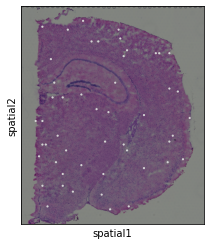

In [9]:
# subset adata to make computation of features fast
adata = adata[0:50]
# show which spots are selected for calculating the features
sc.pl.spatial(adata)

## Calculate image features
`calculate_image_features` extracts features from the tissue image and writes the result to `adata.obsm[key]`.

In [10]:
# calculate features
sq.image.calculate_image_features(adata, img, features=['summary', 'texture', 'color_hist'], key='features')


In [11]:
print(f"calculated features: {list(adata.obsm['features'].columns)}")
display(adata.obsm['features'].head())

calculated features: ['summary_quantile_0.9_ch_0', 'summary_quantile_0.5_ch_0', 'summary_quantile_0.1_ch_0', 'summary_quantile_0.9_ch_1', 'summary_quantile_0.5_ch_1', 'summary_quantile_0.1_ch_1', 'summary_quantile_0.9_ch_2', 'summary_quantile_0.5_ch_2', 'summary_quantile_0.1_ch_2', 'texture_contrast_dist_1_angle_0.00', 'texture_contrast_dist_1_angle_0.79', 'texture_contrast_dist_1_angle_1.57', 'texture_contrast_dist_1_angle_2.36', 'texture_dissimilarity_dist_1_angle_0.00', 'texture_dissimilarity_dist_1_angle_0.79', 'texture_dissimilarity_dist_1_angle_1.57', 'texture_dissimilarity_dist_1_angle_2.36', 'texture_homogeneity_dist_1_angle_0.00', 'texture_homogeneity_dist_1_angle_0.79', 'texture_homogeneity_dist_1_angle_1.57', 'texture_homogeneity_dist_1_angle_2.36', 'texture_correlation_dist_1_angle_0.00', 'texture_correlation_dist_1_angle_0.79', 'texture_correlation_dist_1_angle_1.57', 'texture_correlation_dist_1_angle_2.36', 'texture_ASM_dist_1_angle_0.00', 'texture_ASM_dist_1_angle_0.79',

,summary_quantile_0.9_ch_0,summary_quantile_0.5_ch_0,summary_quantile_0.1_ch_0,summary_quantile_0.9_ch_1,summary_quantile_0.5_ch_1,summary_quantile_0.1_ch_1,summary_quantile_0.9_ch_2,summary_quantile_0.5_ch_2,summary_quantile_0.1_ch_2,texture_contrast_dist_1_angle_0.00,...,color_hist_ch_2_bin_0,color_hist_ch_2_bin_1,color_hist_ch_2_bin_2,color_hist_ch_2_bin_3,color_hist_ch_2_bin_4,color_hist_ch_2_bin_5,color_hist_ch_2_bin_6,color_hist_ch_2_bin_7,color_hist_ch_2_bin_8,color_hist_ch_2_bin_9
obs_id,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,132.0,111.0,77.0,102.0,79.0,54.0,138.0,111.0,88.0,178.161900,...,0,2,235,1976,4098,1359,238,11,2,0
AAACAATCTACTAGCA-1,140.0,111.0,80.0,87.0,60.0,39.0,135.0,108.0,84.0,119.675689,...,0,5,380,2506,3688,1181,160,1,0,0
AAACACCAATAACTGC-1,132.0,116.0,89.0,109.0,91.0,67.0,130.0,117.0,97.0,42.551583,...,0,1,178,871,5708,1162,1,0,0,0
AAACAGAGCGACTCCT-1,136.0,116.0,93.0,115.0,82.0,58.0,137.0,113.0,89.0,156.169944,...,0,4,171,1926,4193,1451,170,6,0,0
AAACCGGGTAGGTACC-1,137.0,112.0,83.0,103.0,78.0,54.0,133.0,113.0,92.0,93.968973,...,0,0,76,1777,4661,1365,42,0,0,0


## Extract features with different crop sizes and image scales
Features are extracted from image crops that are centered on the visium spots (see also `tutorial_image_cropping.ipynb`). By default, the crops have the same size as the spot, are not scaled and not masked. We can use the `mask_circle`, `scale`, and `size` arguments to change how the crops are generated. 

- Use `mask_circle=True, scale=1, size=1`, if you would like to get features that are calculated only from tissue in a visium spot
- Use `scale=X`, with `X < 1`, if you would like to downscale the crop before extracting the features
- Use `size=X`, with `X > 1`, if you would like to extract crops that are X-times the size of the visium spot

In [12]:
# calculate features with masking
sq.image.calculate_image_features(adata, img, ['summary', 'texture', 'color_hist'], 
                                                   key='features_masked', mask_circle=True)
# calculate features with scaling and larger context
sq.image.calculate_image_features(adata, img, ['summary', 'texture', 'color_hist'], 
                                                   key='features_scaled', mask_circle=True, size=2, scale=0.5)



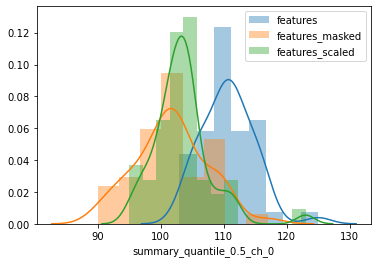

In [13]:
# plot distribution of median for different cropping options
sns.distplot(adata.obsm['features']['summary_quantile_0.5_ch_0'], label='features')
sns.distplot(adata.obsm['features_masked']['summary_quantile_0.5_ch_0'], label='features_masked')
sns.distplot(adata.obsm['features_scaled']['summary_quantile_0.5_ch_0'], label='features_scaled')
_ = plt.legend()


masked features have lower median values, because the area outside the circle is masked with zeros.

## Details of implemented features
### Summary statistics
Summary statistics give a good overview over the intensity of the three image channels at the location of the visium spots.
By default, the 0.9th, 0.5th, and 0.1th quantiles are calculated.

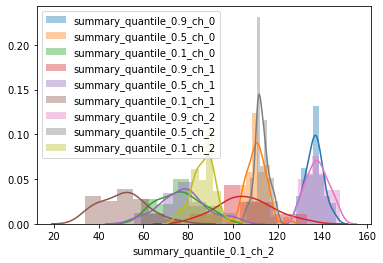

In [14]:
sq.image.calculate_image_features(adata, img, ['summary'], key='summary_features')

# show the distribution of calculated quantiles
for col_id in adata.obsm['summary_features'].columns:
    sns.distplot(adata.obsm['summary_features'][col_id], label=col_id)
plt.legend()

Using `features_kwargs`, we can change which quantiles are calculated, additionally calculate mean and std for each crop, and set the channels for which the features should be calculated

In [15]:
sq.image.calculate_image_features(adata, img, ['summary'], key='summary_features', 
                                 features_kwargs={'summary': {'channels': [1,2], 'mean':True, 'quantiles':[0.4]}})
print(adata.obsm['summary_features'].columns)

Index(['summary_quantile_0.4_ch_1', 'summary_mean_ch_1',
       'summary_quantile_0.4_ch_2', 'summary_mean_ch_2'],
      dtype='object')


### Texture features
These features give a measure of how the image intensity at different distances and angles varies by calculating a grey-level co-occurence matrix (GLCM). From this data, different features (`props`) are calculated.
With the `features_kwargs` `distances` and `angles` we can change how the GLCM is calculated, and with `props` we adapt which features are extracted from it. 

In [16]:
sq.image.calculate_image_features(adata, img, ['texture'], key='texture_features', 
                                 features_kwargs={'texture': 
                                                  {'distances': [2], 'angles':[0], 
                                                  'props': ['contrast', 'correlation']}})


Index(['texture_contrast_dist_2_angle_0.00', 'texture_correlation_dist_2_angle_0.00'], dtype='object')


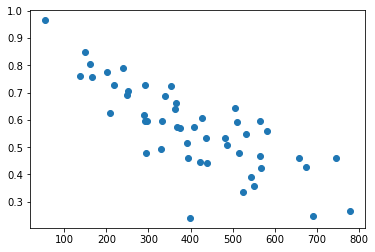

In [17]:
print(adata.obsm['texture_features'].columns)
# show the resulting features
_ = plt.scatter(
    adata.obsm['texture_features']['texture_contrast_dist_2_angle_0.00'],
    adata.obsm['texture_features']['texture_correlation_dist_2_angle_0.00']
)

the features contrast and correlation are inversely correlated

### Color histogram
These features give a more detailled view than summary_features by computing a histogram of each image channel. We can adapt the `channels` and the number of `bins` for the histogram.

In [18]:
sq.image.calculate_image_features(adata, img, ['color_hist'], key='hist_features', 
                                 features_kwargs={'color_hist':{'bins':10, 'channels': [1]}})


/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


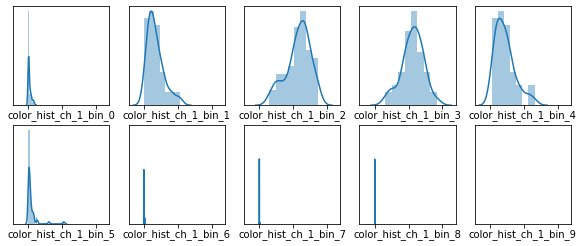

In [19]:
# plot the distribution of counts in different bins for all spots
fig, axes = plt.subplots(2,5, sharex=True, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    sns.distplot(adata.obsm['hist_features'][f'color_hist_ch_1_bin_{i}'], ax=ax)
    ax.tick_params(axis=u'y', which=u'both',length=0)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

### Segmentation
We can also extract special features from a binary segmented image. Here, we extract the number of objects and the average size of objects.

TODO fix segmentation - add smoothing before?

In [20]:
# set path to dataset
BASE_PATH = "../../data"
dataset_folder = os.path.join(BASE_PATH, "2020_10XFluoVisium_MouseBrain2_giovanni.palla")
adata, img = sq.read_visium_data(dataset_folder)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/spatial-scanpy/lib/python3.7/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [21]:
sq.image.segment_img(img=img, img_id="image", model_group="watershed", key_added="image_watershed",
    model_kwargs={
        "thresh": 50000, 
        "geq": True
    },
    xs=1000,
    ys=1000,
)

RuntimeError: sequence argument must have length equal to input rank

## Plot features on image using napari
TODO

## Using another image channel
The ImageContainer may contain more images than just the tissue image. As shown in `ref-to-smoothing-notebook`, we can preprocess the image by e.g. smoothing it.
Use the `img_id` argument to set the image layer that should be used to extract the features.

TODO: results look weird

In [35]:
import spatial_tools.image.processing 

In [53]:
spatial_tools.image.processing.process_img(img, img_id='image', processing='smooth', key_added='image_smooth',
                                           processing_kwargs={'preserve_range': True, 'multichannel': True})

In [42]:
spatial_tools.image.tools.calculate_image_features(adata, img, ['summary'], key='summary_features', img_id='image',
                                                   features_kwargs={'summary': {'channels': 0, 'mean':True, 'quantiles':[]}})




In [48]:
spatial_tools.image.tools.calculate_image_features(adata, img, ['summary'], key='summary_features_smooth', img_id='image_smooth',
                                                   features_kwargs={'summary': {'channels': 0, 'mean':True, 'quantiles':[]}})



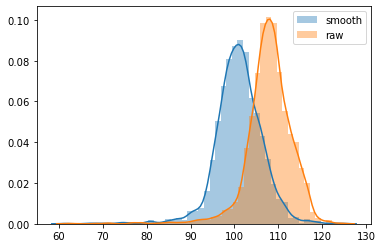

In [49]:
sns.distplot(adata.obsm['summary_features_smooth'], label='smooth')
sns.distplot(adata.obsm['summary_features'], label='raw')
plt.legend()

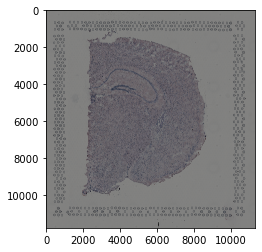

In [54]:
plt.imshow(img.data['image_smooth'].transpose('y','x', ...).values.astype(np.uint8))

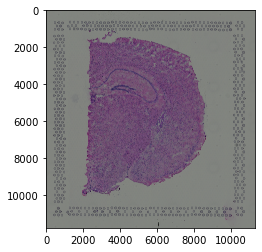

In [55]:
plt.imshow(img.data['image'].transpose('y','x', ...).values.astype(np.uint8))